<a href="https://colab.research.google.com/github/padmashree1995/skills-updates/blob/main/task1_Fake_news_Detection_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
#load the data
data= pd.read_csv("/content/sample_data/Fake.csv")
data= pd.read_csv("/content/sample_data/True.csv")

In [3]:
data.head

<bound method NDFrame.head of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters)

In [6]:
data.shape

(21417, 4)

In [7]:
data.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [8]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
data.dtypes.value_counts()

object    4
dtype: int64

In [10]:
data.duplicated

<bound method DataFrame.duplicated of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (

In [11]:
data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [12]:
data.info

<bound method DataFrame.info of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuter

In [13]:
data=data.fillna(' ')
data=data.fillna(' ')


In [14]:
# Have a glance at our training set
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [15]:
# Adding A Target Class Column To Indicate Whether The News Is Real Or Fake
data['isfake'] = 1
data.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [16]:
data['isfake'] = 0
data.head()

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [17]:
data.index

RangeIndex(start=0, stop=21417, step=1)

In [18]:
data.values

array([['As U.S. budget fight looms, Republicans flip their fiscal script',
        'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportiona

In [19]:
# Concatenating Real And Fake News
data = pd.concat([data , data]).reset_index(drop = True)
data

,title,text,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
42829,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
42830,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
42831,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
42832,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [20]:
data.drop(columns = ['text'], inplace = True)

In [21]:
data.head()

,title,subject,date,isfake
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",0


In [22]:
data = data.sample(frac = 1)

In [23]:
data.head

<bound method NDFrame.head of                                                    title       subject  \
5914   Iraq Shi'ite paramilitary calls for ban on U.S...  politicsNews   
19249  Saudi Arabia condemns Myanmar government 'poli...     worldnews   
4627   Obama's defense chief doesn't see big changes ...  politicsNews   
31085  Not over yet: Reid cautions Democrats relishin...  politicsNews   
24702  Coalition of 13 states to challenge Trump on v...  politicsNews   
...                                                  ...           ...   
28907  U.S. election largely peaceful, despite intimi...  politicsNews   
16034  Iran seen as winner after Iraq's Kurds lose re...     worldnews   
28387  FBI to gain expanded hacking powers as Senate ...  politicsNews   
11342  Syrian army and Iranian proxies demand surrend...     worldnews   
20401  After financial pledges, France urges Chad to ...     worldnews   

                      date  isfake  
5914     January 29, 2017        0  
19249  

In [24]:
data.merge

<bound method DataFrame.merge of                                                    title       subject  \
5914   Iraq Shi'ite paramilitary calls for ban on U.S...  politicsNews   
19249  Saudi Arabia condemns Myanmar government 'poli...     worldnews   
4627   Obama's defense chief doesn't see big changes ...  politicsNews   
31085  Not over yet: Reid cautions Democrats relishin...  politicsNews   
24702  Coalition of 13 states to challenge Trump on v...  politicsNews   
...                                                  ...           ...   
28907  U.S. election largely peaceful, despite intimi...  politicsNews   
16034  Iran seen as winner after Iraq's Kurds lose re...     worldnews   
28387  FBI to gain expanded hacking powers as Senate ...  politicsNews   
11342  Syrian army and Iranian proxies demand surrend...     worldnews   
20401  After financial pledges, France urges Chad to ...     worldnews   

                      date  isfake  
5914     January 29, 2017        0  
1924

In [27]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

In [28]:
data.columns

Index(['title', 'subject', 'date', 'isfake'], dtype='object')

In [29]:
data.head()

,title,subject,date,isfake
0,Iraq Shi'ite paramilitary calls for ban on U.S...,politicsNews,"January 29, 2017",0
1,Saudi Arabia condemns Myanmar government 'poli...,worldnews,"September 23, 2017",0
2,Obama's defense chief doesn't see big changes ...,politicsNews,"March 28, 2017",0
3,Not over yet: Reid cautions Democrats relishin...,politicsNews,"May 5, 2016",0
4,Coalition of 13 states to challenge Trump on v...,politicsNews,"June 9, 2017",0


In [84]:
data.title.count()

42834

In [85]:
data.subject.value_counts()

politicsNews    22544
worldnews       20290
Name: subject, dtype: int64

In [99]:
data.tail

<bound method NDFrame.tail of                                                    title       subject  \
0      Iraq Shi'ite paramilitary calls for ban on U.S...  politicsNews   
1      Saudi Arabia condemns Myanmar government 'poli...     worldnews   
2      Obama's defense chief doesn't see big changes ...  politicsNews   
3      Not over yet: Reid cautions Democrats relishin...  politicsNews   
4      Coalition of 13 states to challenge Trump on v...  politicsNews   
...                                                  ...           ...   
42829  U.S. election largely peaceful, despite intimi...  politicsNews   
42830  Iran seen as winner after Iraq's Kurds lose re...     worldnews   
42831  FBI to gain expanded hacking powers as Senate ...  politicsNews   
42832  Syrian army and Iranian proxies demand surrend...     worldnews   
42833  After financial pledges, France urges Chad to ...     worldnews   

                      date  isfake  
0        January 29, 2017        0  
1      

In [100]:
data.describe

<bound method NDFrame.describe of                                                    title       subject  \
0      Iraq Shi'ite paramilitary calls for ban on U.S...  politicsNews   
1      Saudi Arabia condemns Myanmar government 'poli...     worldnews   
2      Obama's defense chief doesn't see big changes ...  politicsNews   
3      Not over yet: Reid cautions Democrats relishin...  politicsNews   
4      Coalition of 13 states to challenge Trump on v...  politicsNews   
...                                                  ...           ...   
42829  U.S. election largely peaceful, despite intimi...  politicsNews   
42830  Iran seen as winner after Iraq's Kurds lose re...     worldnews   
42831  FBI to gain expanded hacking powers as Senate ...  politicsNews   
42832  Syrian army and Iranian proxies demand surrend...     worldnews   
42833  After financial pledges, France urges Chad to ...     worldnews   

                      date  isfake  
0        January 29, 2017        0  
1  

In [101]:
data.duplicated().sum()

21646

In [102]:
data.drop_duplicates(inplace=True)

In [30]:
# Downloading Stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [32]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [33]:
# Showing Original News
data.head(5)

,title,subject,date,isfake
0,Iraq Shi'ite paramilitary calls for ban on U.S...,politicsNews,"January 29, 2017",0
1,Saudi Arabia condemns Myanmar government 'poli...,worldnews,"September 23, 2017",0
2,Obama's defense chief doesn't see big changes ...,politicsNews,"March 28, 2017",0
3,Not over yet: Reid cautions Democrats relishin...,politicsNews,"May 5, 2016",0
4,Coalition of 13 states to challenge Trump on v...,politicsNews,"June 9, 2017",0


In [34]:
list_of_words = []
for i in data:
    for j in i:
        list_of_words.append(j)

In [35]:
list_of_words

['t',
 'i',
 't',
 'l',
 'e',
 's',
 'u',
 'b',
 'j',
 'e',
 'c',
 't',
 'd',
 'a',
 't',
 'e',
 'i',
 's',
 'f',
 'a',
 'k',
 'e']

In [36]:
len(list_of_words)

22

In [37]:
# Obtaining The Total Number Of Unique Words
total_words = len(list(set(list_of_words)))
total_words

13

In [40]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

plotting the graph

<Axes: xlabel='count', ylabel='isfake'>

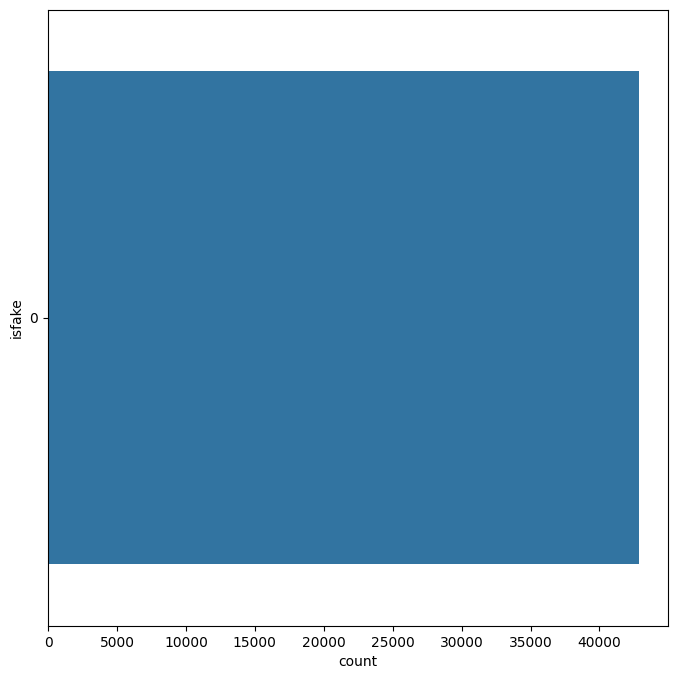

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = data)

<Axes: xlabel='count', ylabel='isfake'>

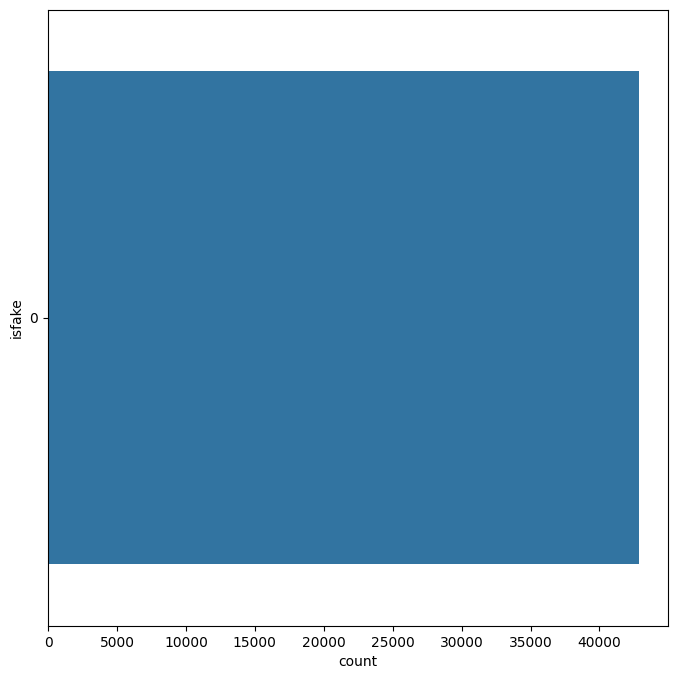

In [47]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = data)

<Axes: xlabel='isfake', ylabel='count'>

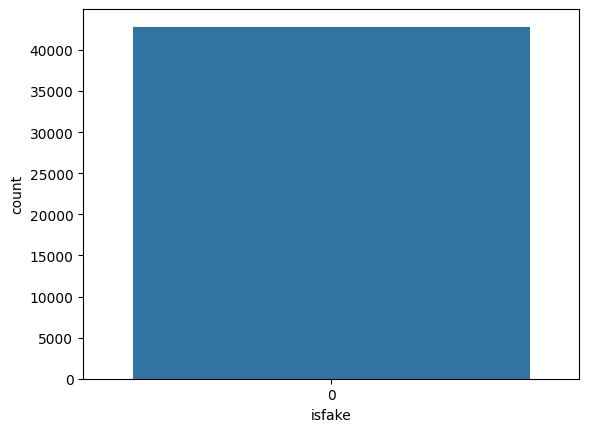

In [48]:
sns.countplot(x='isfake', data=data)

In [49]:
# Splitting Data Into Test And Train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, data.isfake, test_size = 0.2)

In [50]:
x_train

,title,subject,date,isfake
14346,Ryan says Republicans should follow 'conscienc...,politicsNews,"June 17, 2016",0
3825,South Korea says delay in joint U.S. drills de...,worldnews,"December 20, 2017",0
35131,"Republicans revamp U.S. health bill, boost ben...",politicsNews,"March 19, 2017",0
36791,Republican Senator Daines says he will support...,politicsNews,"December 1, 2017",0
27055,Northern Ireland political talks stall as time...,worldnews,"October 18, 2017",0
...,...,...,...,...
25347,Court hearing on Trump travel ban draws more t...,politicsNews,"February 9, 2017",0
38971,Senate panel backs nomination of Fanning as U....,politicsNews,"March 10, 2016",0
15845,German lawmakers visit Turkish air base but di...,worldnews,"September 8, 2017",0
16108,South Africa's Zuma says supports 'people of Z...,worldnews,"November 18, 2017",0


In [51]:
x_test

,title,subject,date,isfake
22770,India says ready for stronger U.S. ties after ...,worldnews,"October 20, 2017",0
7051,U.S. Navy carrier drills with Japanese navy am...,politicsNews,"September 22, 2017",0
15910,Trump to nominate former Senate aide Peirce fo...,politicsNews,"July 18, 2017",0
10146,U.S. interior secretary raised political funds...,politicsNews,"October 5, 2017",0
33870,"U.S. Republicans ax disclosure, emissions rule...",politicsNews,"February 3, 2017",0
...,...,...,...,...
27802,"U.S. watching piracy increase off Somalia, see...",politicsNews,"April 23, 2017",0
16713,Union leader shot dead near South African Lonm...,worldnews,"September 23, 2017",0
37880,EU vows push to make Jerusalem capital for Pal...,worldnews,"December 7, 2017",0
18762,China-made truck used in North Korea parade to...,politicsNews,"April 18, 2017",0


In [52]:
y_train

14346    0
3825     0
35131    0
36791    0
27055    0
        ..
25347    0
38971    0
15845    0
16108    0
24154    0
Name: isfake, Length: 34267, dtype: int64

In [53]:
y_test

22770    0
7051     0
15910    0
10146    0
33870    0
        ..
27802    0
16713    0
37880    0
18762    0
8672     0
Name: isfake, Length: 8567, dtype: int64

In [54]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2))

In [57]:
X = data.iloc[:35000,0]
y = data.iloc[:35000,1]

In [58]:
X.head()

0    Iraq Shi'ite paramilitary calls for ban on U.S...
1    Saudi Arabia condemns Myanmar government 'poli...
2    Obama's defense chief doesn't see big changes ...
3    Not over yet: Reid cautions Democrats relishin...
4    Coalition of 13 states to challenge Trump on v...
Name: title, dtype: object

In [59]:
y.head()

0    politicsNews
1       worldnews
2    politicsNews
3    politicsNews
4    politicsNews
Name: subject, dtype: object

In [60]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(X , y , test_size = 0.2 ,random_state = 0)

In [61]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [94]:
max_features = 10000
maxlen = 300

In [105]:
# Loading count vectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating count vectorizer
cv = CountVectorizer()

# Fitting and transforming X train
X_train_vect = cv.fit_transform(train_X)

# Tranforming X test
X_test_vect = cv.transform(test_X)

In [109]:
# Loading libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Instantiating logistic regression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_vect,train_y)

# Predicting the value of y_train using the model
y_pred_train = logreg.predict(X_train_vect)

# Predicting the value of y_test using the model
y_pred_test = logreg.predict(X_test_vect)


# Accuracy of the training and testing data
train_accuracy = accuracy_score(train_y,y_pred_train)
test_accuracy = accuracy_score(test_y,y_pred_test)
print(f'Train accuracy - {train_accuracy} \nTest accuracy - {test_accuracy}')

Train accuracy - 0.9698571428571429 
Test accuracy - 0.9394285714285714


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
# Classification report for training data
categories=['real','fake']
print(classification_report(train_y,y_pred_train,target_names=categories,digits=4))

              precision    recall  f1-score   support

        real     0.9739    0.9687    0.9713     14732
        fake     0.9655    0.9711    0.9683     13268

    accuracy                         0.9699     28000
   macro avg     0.9697    0.9699    0.9698     28000
weighted avg     0.9699    0.9699    0.9699     28000



In [112]:
# Classification report for testing data
print(classification_report(test_y,y_pred_test,target_names=categories,digits=4))

              precision    recall  f1-score   support

        real     0.9471    0.9351    0.9411      3621
        fake     0.9314    0.9441    0.9377      3379

    accuracy                         0.9394      7000
   macro avg     0.9393    0.9396    0.9394      7000
weighted avg     0.9395    0.9394    0.9394      7000

